In [1]:
# !pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
#Generators : for deviding large dataset into small batches at one time one batch load in ram and after that it remove from ram

train_ds = keras.utils.image_dataset_from_directory(
    directory="./Dataset/train",
    labels="inferred",
    label_mode="categorical",
    class_names=["yes","no"],
    batch_size=32,
    image_size=(256, 256),
)

test_ds = keras.utils.image_dataset_from_directory(
    directory="./Dataset/test",
    labels="inferred",
    label_mode="categorical",
    class_names=["yes","no"],
    batch_size=32,
    image_size=(256, 256),
)

Found 3000 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [3]:
#Normalization : here we convert the image's pixel between 0 and 1

def normalize(image,label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

In [4]:
#Build CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))     #convolution layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))                                    #pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())                                                       #flatten layer

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(2,activation="softmax"))

D:\PythonPro\BrainTumorDetection\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,258 (56.64 MB)

 Trainable params: 14,847,810 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [6]:
# compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])      # binary classification problem that's why loss="binary_crossentropy"  if multiclassification then Loss="categorical_crossentropy"

In [7]:
history = model.fit(train_ds,epochs=8, validation_data=test_ds)

Epoch 1/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.7568 - loss: 2.5573 - val_accuracy: 0.5000 - val_loss: 9.1202
Epoch 2/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9046 - loss: 0.2702 - val_accuracy: 0.5600 - val_loss: 5.8223
Epoch 3/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.9406 - loss: 0.1564 - val_accuracy: 0.6800 - val_loss: 1.0449
Epoch 4/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.9713 - loss: 0.1025 - val_accuracy: 0.7200 - val_loss: 0.6858
Epoch 5/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9774 - loss: 0.0731 - val_accuracy: 0.9000 - val_loss: 0.3145
Epoch 6/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.9831 - loss: 0.0518 - val_accuracy: 0.9250 - val_loss: 0.1898
Epoch 7/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.9864 - loss: 0.0408 - val_accuracy: 0.9550 - val_loss: 0.1398
Epoch 8/8
94/94 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.9622 - loss: 0.1169 - val_accuracy: 1.0000 - val_loss:

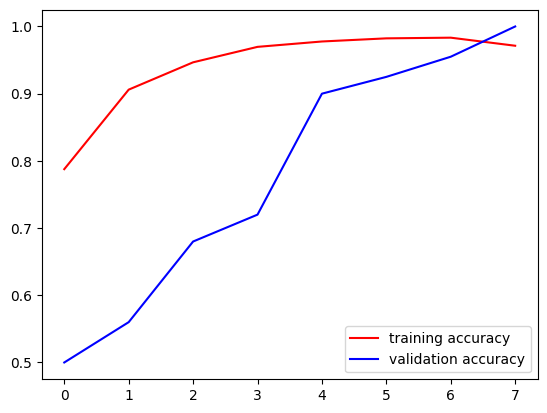

In [10]:
# graph of training_accuracy v/s testing_accuracy
#!pip install matplotlib
import matplotlib.pyplot as plt 

plt.plot(history.history["accuracy"],color="red",label="training accuracy")
plt.plot(history.history["val_accuracy"],color="blue",label="validation accuracy")
plt.legend()
plt.show()

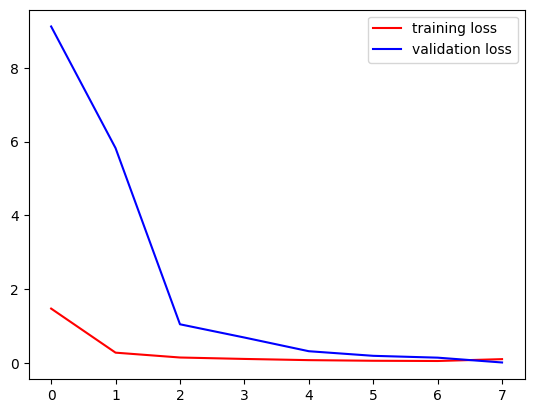

In [11]:
# graph of training_loss v/s testing_loss

plt.plot(history.history["loss"],color="red",label="training loss")
plt.plot(history.history["val_loss"],color="blue",label="validation loss")
plt.legend()
plt.show()

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -----------------

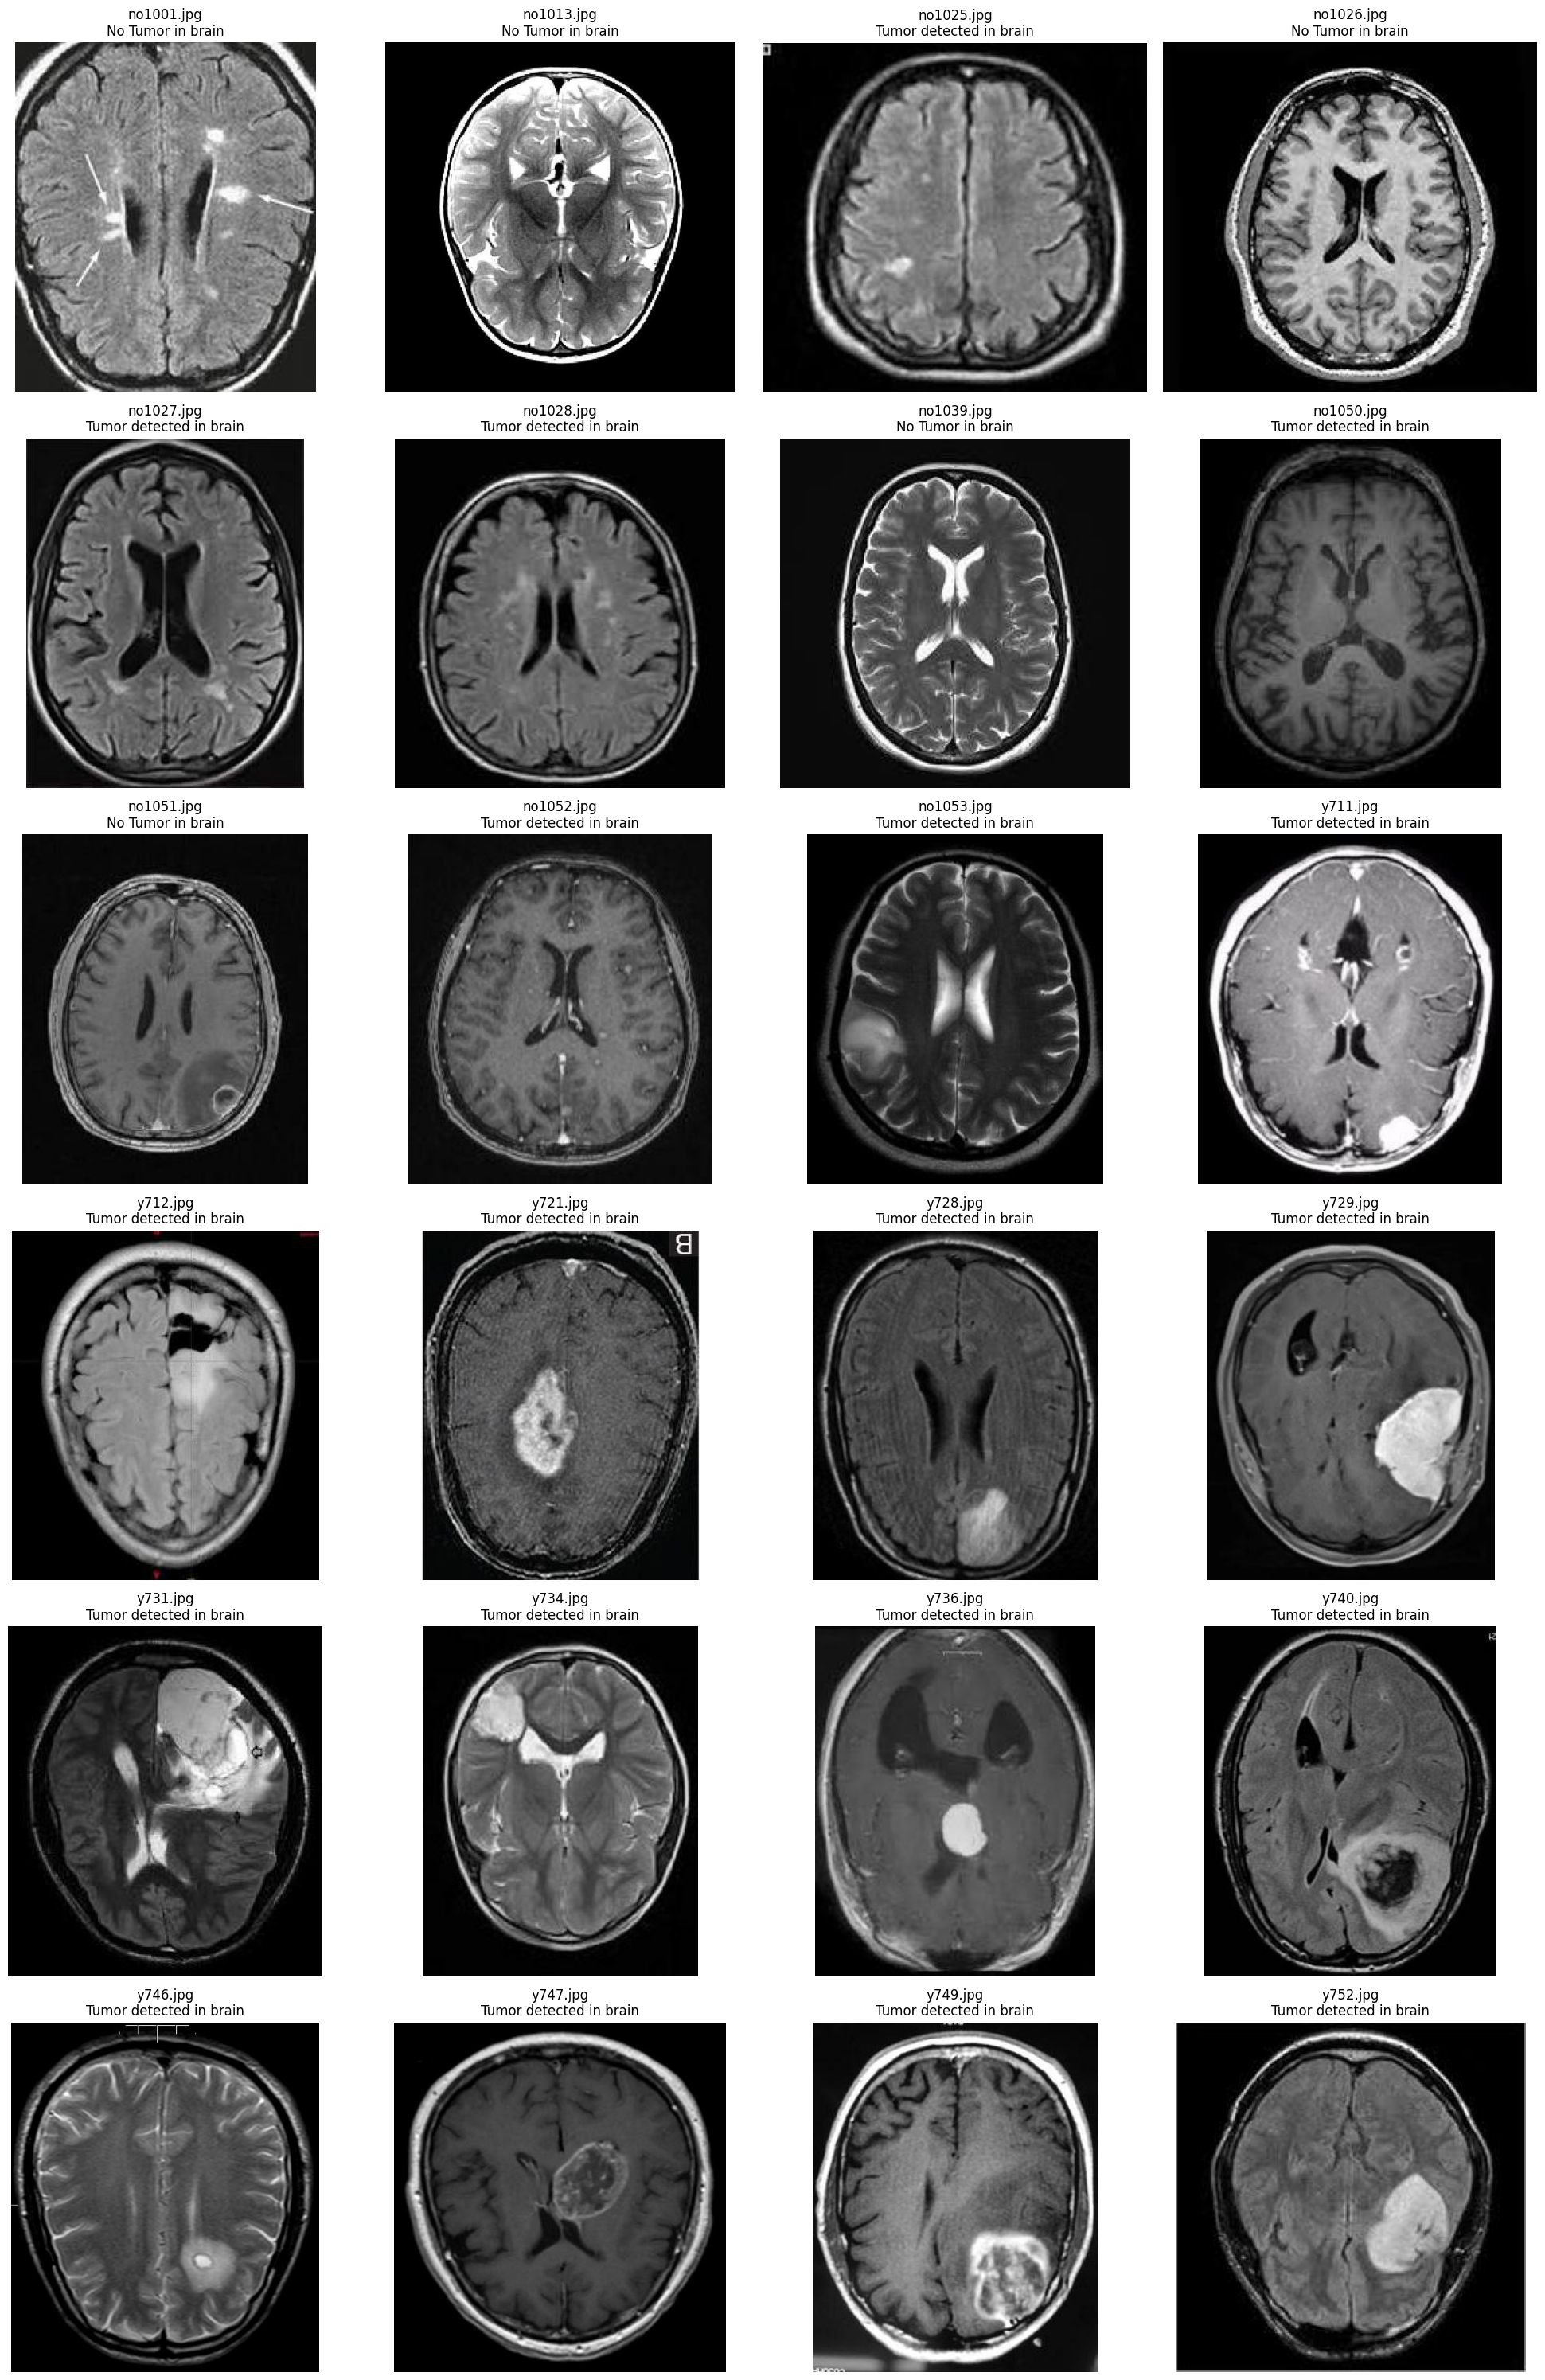

In [13]:
!pip install opencv-python

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def img_processing(image_path, model):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at path '{image_path}'")
        return None
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (256, 256))
    test_input = image_resized.reshape((1, 256, 256, 3))
    
    prediction = model.predict(test_input)

    # Get the class index with the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)

    # Map the index to the class name
    class_names = ["Tumor detected in brain", "No Tumor in brain"]
    predicted_class = class_names[predicted_class_index[0]]
    return image, predicted_class

def test_on_folder(folder_path, model):
    images = []
    predictions = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(folder_path, filename)
            result = img_processing(image_path, model)
            if result is not None:
                image, prediction = result
                images.append(image)
                predictions.append((filename, prediction))
    return images, predictions

def display_images(images, predictions, columns=4):
    rows = (len(images) + columns - 1) // columns
    plt.figure(figsize=(20, 5 * rows))
    for i, (image, (filename, prediction)) in enumerate(zip(images, predictions)):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(image)
        plt.title(f"{filename}\n{prediction}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming 'model' is your pre-trained model
test_folder_path = "./Dataset/test/testing_images"
images, predictions = test_on_folder(test_folder_path, model)
display_images(images, predictions)


In [ ]:
# import joblib

# joblib.dump(model,"brain_tumor_detection_model")

In [ ]:
#import joblib

#model = joblib.load("brain_tumor_detection_model")